In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow import keras

/Users/yuenchitcheng/opt/anaconda3/envs/Sign_Language/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yuenchitcheng/opt/anaconda3/envs/Sign_Language/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yuenchitcheng/opt/anaconda3/envs/Sign_Language/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

## 1. Set up camera, detection and landmarks

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model > making detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities > draw characteristics

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
# check connections
mp_holistic.FACEMESH_TESSELATION

frozenset({(302, 11),
           (363, 420),
           (217, 126),
           (236, 174),
           (455, 460),
           (347, 280),
           (439, 438),
           (22, 154),
           (98, 203),
           (352, 280),
           (370, 462),
           (7, 25),
           (51, 195),
           (5, 195),
           (336, 337),
           (455, 289),
           (456, 437),
           (202, 204),
           (41, 74),
           (150, 169),
           (285, 441),
           (111, 123),
           (134, 198),
           (446, 265),
           (414, 413),
           (314, 17),
           (279, 294),
           (322, 410),
           (420, 456),
           (148, 152),
           (196, 236),
           (52, 105),
           (131, 49),
           (247, 30),
           (175, 152),
           (258, 257),
           (9, 336),
           (446, 255),
           (448, 261),
           (120, 231),
           (321, 375),
           (11, 72),
           (236, 51),
           (371, 355),
        

In [9]:
#Open the cam and close the cam by pressing "q"
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #read feed
        ret, frame = cap.read()
        
        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # draw landmarks
        draw_styled_landmarks(image, results)
        
        #show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #stop cam and break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            break

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
# check no. of landmarks
len(results.left_hand_landmarks.landmark)

21

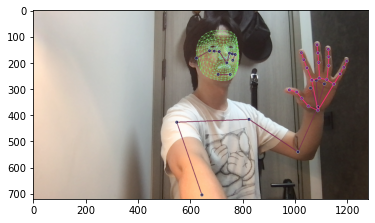

In [11]:
# check last frame from video capture and make it RGB color mode
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

## 2. Extract key point values and make it into numpy array

In [7]:
# we need to create np.array for each detection result and flatten it for LSTM later
# if detection is absent for certain part, then put zero in the array

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh]) 

## 3. Set up folders for data collection

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect and set data export path
actions = np.array(['travel','business','visit','relatives',
                    'fever','headache','runny nose','sore throat','tummy ache',
                    'drink','water','toilet','sick','thank you',
                    'atm','car park','no hands detected'])

#hospital_1 = np.array(['fever', 'headache', 'runny nose', 'sore throat', 'tummy ache'])
#hospital_2 = np.array(['drink', 'water', 'toilet', 'sick', 'thank you'])
#shopping_mall = np.array(['atm', 'car park'])
#actions = np.concatenate([immigration, hospital_1, hospital_2, shopping_mall])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [9]:
actions

array(['travel', 'business', 'visit', 'relatives', 'fever', 'headache',
       'runny nose', 'sore throat', 'tummy ache', 'drink', 'water',
       'toilet', 'sick', 'thank you', 'atm', 'car park',
       'no hands detected'], dtype='<U17')

In [15]:
#DATA_PATH_1 = os.path.join('MP_Data_1')

In [16]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            #os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 4. Data collection for different words

In [17]:
def train(word):
    cap = cv2.VideoCapture(0)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION: {} VIDEO {}'.format(word, sequence), (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(word, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, word, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        cap.release()
        cv2.destroyAllWindows()
        cv2.waitKey(1)

In [70]:
word = 'no hands detected'

In [71]:
np.array(word)

array('no hands detected', dtype='<U17')

In [72]:
train(word)

In [73]:
cap = cv2.VideoCapture(0)

In [74]:
cap.release()

## 5. Data preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'travel': 0,
 'business': 1,
 'visit': 2,
 'relatives': 3,
 'fever': 4,
 'headache': 5,
 'runny nose': 6,
 'sore throat': 7,
 'tummy ache': 8,
 'drink': 9,
 'water': 10,
 'toilet': 11,
 'sick': 12,
 'thank you': 13,
 'atm': 14,
 'car park': 15,
 'no hands detected': 16}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
X = np.array(sequences)
X.shape

(510, 30, 1662)

In [22]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [23]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
X_train.shape

(382, 30, 1662)

In [26]:
X_test.shape

(128, 30, 1662)

## 6. Model building (LSTM)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

In [13]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [17]:
model=load_model('0513_Jack.h5') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2022-05-16 17:36:29.448901: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-16 17:36:29.450299: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
model.compile(keras.optimizers.Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [88]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2022-05-13 22:20:42.132180: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-13 22:20:42.132583: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/300
 32/382 [=>............................] - ETA: 41s - loss: 2.8386 - categorical_accuracy: 0.0625

2022-05-13 22:20:46.449740: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
2022-05-13 22:20:46.450999: I tensorflow/core/profiler/lib/profiler_session.cc:174] Profiler session started.


382/382 [==============================] - 7s 17ms/sample - loss: 2.8319 - categorical_accuracy: 0.0524
Epoch 2/300
382/382 [==============================] - 4s 10ms/sample - loss: 2.8281 - categorical_accuracy: 0.0497
Epoch 3/300
382/382 [==============================] - 4s 9ms/sample - loss: 2.8239 - categorical_accuracy: 0.0550
Epoch 4/300
382/382 [==============================] - 4s 10ms/sample - loss: 2.8153 - categorical_accuracy: 0.0602
Epoch 5/300
382/382 [==============================] - 3s 8ms/sample - loss: 2.8004 - categorical_accuracy: 0.1126
Epoch 6/300
382/382 [==============================] - 3s 7ms/sample - loss: 2.7859 - categorical_accuracy: 0.1178
Epoch 7/300
382/382 [==============================] - 3s 7ms/sample - loss: 2.7735 - categorical_accuracy: 0.1204
Epoch 8/300
382/382 [==============================] - 3s 7ms/sample - loss: 2.7567 - categorical_accuracy: 0.1230
Epoch 9/300
382/382 [==============================] - 3s 8ms/sample - loss: 2.7338 - cat

382/382 [==============================] - 8s 21ms/sample - loss: 0.4936 - categorical_accuracy: 0.8665
Epoch 141/300
382/382 [==============================] - 4s 12ms/sample - loss: 0.4743 - categorical_accuracy: 0.8717
Epoch 142/300
382/382 [==============================] - 11s 29ms/sample - loss: 0.4613 - categorical_accuracy: 0.8770
Epoch 143/300
382/382 [==============================] - 9s 24ms/sample - loss: 0.4458 - categorical_accuracy: 0.8770
Epoch 144/300
382/382 [==============================] - 8s 22ms/sample - loss: 0.4324 - categorical_accuracy: 0.8848
Epoch 145/300
382/382 [==============================] - 12s 32ms/sample - loss: 0.4156 - categorical_accuracy: 0.8848
Epoch 146/300
382/382 [==============================] - 3s 9ms/sample - loss: 0.3962 - categorical_accuracy: 0.8874
Epoch 147/300
382/382 [==============================] - 7s 19ms/sample - loss: 0.3894 - categorical_accuracy: 0.8822
Epoch 148/300
382/382 [==============================] - 8s 22ms/samp

382/382 [==============================] - 9s 24ms/sample - loss: 0.0573 - categorical_accuracy: 0.9843
Epoch 279/300
382/382 [==============================] - 3s 9ms/sample - loss: 0.0567 - categorical_accuracy: 0.9843
Epoch 280/300
382/382 [==============================] - 8s 22ms/sample - loss: 0.0563 - categorical_accuracy: 0.9843
Epoch 281/300
382/382 [==============================] - 8s 21ms/sample - loss: 0.0555 - categorical_accuracy: 0.9843
Epoch 282/300
382/382 [==============================] - 7s 19ms/sample - loss: 0.0548 - categorical_accuracy: 0.9843
Epoch 283/300
382/382 [==============================] - 10s 27ms/sample - loss: 0.0547 - categorical_accuracy: 0.9843
Epoch 284/300
382/382 [==============================] - 7s 17ms/sample - loss: 0.0544 - categorical_accuracy: 0.9843
Epoch 285/300
382/382 [==============================] - 10s 27ms/sample - loss: 0.0564 - categorical_accuracy: 0.9843
Epoch 286/300
382/382 [==============================] - 5s 14ms/samp

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 32)            216960    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 64)            24832     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                561       
Total params: 351,505
Trainable params: 351,505
Non-trainable params: 0
__________________________________________________



## 7. Predictions

In [90]:
res = model.predict(X_test)

In [91]:
r = 50

In [92]:
actions[np.argmax(res[r])]

'toilet'

In [93]:
actions[np.argmax(y_test[r])]

'toilet'

## 8. Save weights

In [94]:
model.save('Hanry_weight.h5')

In [31]:
model.load_weights('Hanry_weight.h5') 

2022-05-14 20:32:48.922621: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-14 20:32:48.924936: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


## 9. Model evaluation

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[121,   2],
        [  0,   5]],

       [[121,   0],
        [  0,   7]],

       [[120,   1],
        [  0,   7]],

       [[116,   0],
        [  0,  12]],

       [[115,   1],
        [  0,  12]],

       [[124,   0],
        [  0,   4]],

       [[116,   0],
        [  2,  10]],

       [[121,   0],
        [  0,   7]],

       [[126,   0],
        [  0,   2]],

       [[119,   0],
        [  2,   7]],

       [[118,   0],
        [  0,  10]],

       [[117,   1],
        [  2,   8]],

       [[123,   1],
        [  0,   4]],

       [[122,   1],
        [  0,   5]],

       [[122,   0],
        [  2,   4]],

       [[121,   1],
        [  0,   6]],

       [[118,   0],
        [  0,  10]]])

In [49]:
accuracy_score(ytrue, yhat)

0.9375

## 10. Real test

In [19]:
def position(sentence):
    try:
        font = cv2.FONT_HERSHEY_SIMPLEX
        textsize = cv2.getTextSize(sentence[0], font, 1, 2)[0]
        textX = (image.shape[1] - textsize[0])/2
        return textX
    except:
        return 0,0

In [20]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]
                
        #display result in sub-title
        if sentence != []:
            cv2.putText(image, ' '.join(sentence), (int(position(sentence)),680), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [103]:
print(actions[np.argmax(res)])

no hands detected


In [104]:
len(sequence)

30